In [1]:
! pip install yfinance

# Define the tickers and date range

In [2]:
import yfinance as yf

In [3]:
# Define the tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOG']
start_date = '2020-01-01'
end_date = '2021-01-01'

In [4]:
# Download the data
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [5]:
# Show first 5 rows
data.head()

Ticker           GOOG                                                  AAPL  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2020-01-02  66.761289  68.084520  66.761289  68.046204  28132000  71.627100   
2020-01-03  67.075298  68.301492  66.960045  67.712280  23728000  71.847118   
2020-01-06  67.181800  69.495836  67.181800  69.381882  34646000  71.034694   
2020-01-07  69.567496  69.818801  69.191272  69.338577  30054000  72.497506   
2020-01-08  69.275880  70.246290  69.214176  69.885002  30560000  71.849540   

Ticker                                                        MSFT  \
Price            High        Low      Close     Volume        Open   
Date                                                                 
2020-01-02  72.681296  71.373226  72.620850  135480400  151.566865   
2020-01-03  72.676447  71.689957  71.914818  146322800  151.127749   
2020-01-06  72.526518  70.783234  72.487831  118387200  149.944070   
2020-01-07  72.753800  71.926892  72.146919  108872000  152.082300   
2020-01-08  73.609752  71.849540  73.307518  132079200  151.710061   

Ticker                                                    
Price             High         Low       Close    Volume  
Date                                                      
2020-01-02  153.428276  151.137310  153.323273  22622100  
2020-01-03  152.683690  150.879551  151.414108  21116200  
2020-01-06  151.872308  149.399957  151.805481  20813700  
2020-01-07  152.416391  150.173158  150.421341  21634100  
2020-01-08  153.495120  150.774585  152.817368  27746500

In [6]:
# show last 5 rows
data.tail()


Ticker           GOOG                                                   AAPL  \
Price            Open       High        Low      Close    Volume        Open   
Date                                                                           
2020-12-24  86.341056  86.888467  86.047942  86.532646   6936000  128.102899   
2020-12-28  87.168881  89.114317  86.905130  88.385864  27860000  130.707502   
2020-12-29  88.968116  89.199518  87.390581  87.521461  25988000  134.668053   
2020-12-30  87.685190  87.838714  85.873268  86.565987  26122000  132.258526   
2020-12-31  86.361950  87.531908  86.361950  87.181068  20238000  130.795340   

Ticker                                                           MSFT  \
Price             High         Low       Close     Volume        Open   
Date                                                                    
2020-12-24  130.190472  127.888287  128.736969   54930100  213.600285   
2020-12-28  133.975425  130.239251  133.341354  124486200  216.523261   
2020-12-29  135.389914  131.048934  131.565948  121047300  218.317592   
2020-12-30  132.658485  130.131924  130.444092   96452100  217.275704   
2020-12-31  131.439175  128.493154  129.439392   99116600  213.870398   

Ticker                                                    
Price             High         Low       Close    Volume  
Date                                                      
2020-12-24  215.712945  213.388053  214.883316  10550600  
2020-12-28  218.047463  215.143770  217.015259  17933500  
2020-12-29  219.156862  215.684009  216.233871  17403200  
2020-12-30  217.661587  213.648499  213.851074  20272300  
2020-12-31  215.124490  211.921733  214.564972  20942100

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

STEP 3: Feature Engineering

In [10]:
# Feature engineering
for ticker in tickers:
    data[(ticker, 'Close_Lag1')] = data[(ticker, 'Close')].shift(1)
    data[(ticker, 'MA_5')] = data[(ticker, 'Close')].rolling(window=5).mean()
    data[(ticker, 'MA_10')] = data[(ticker, 'Close')].rolling(window=10).mean()
    data[(ticker, 'Daily_Return')] = data[(ticker, 'Close')].pct_change()
    data[(ticker, 'Volume_Change')] = data[(ticker, 'Volume')].pct_change()

# Remove NaN values
data.dropna(inplace=True)

# Display engineered features
data.head() # Changed 'd' to 'data'

Ticker           GOOG                                                  AAPL  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2020-01-15  71.173384  71.729997  71.173384  71.620766  25654000  75.401405   
2020-01-16  72.030835  72.257263  71.706368  72.242828  23474000  75.822091   
2020-01-17  72.800682  73.715599  72.567291  73.670563  47924000  76.470093   
2020-01-21  73.607362  74.240859  73.213225  73.870117  40734000  76.692525   
2020-01-22  74.198570  74.806386  73.896496  73.947258  32216000  77.028608   

Ticker                                                  ...        MSFT  \
Price            High        Low      Close     Volume  ...  Close_Lag1   
Date                                                    ...               
2020-01-15  76.283928  74.845290  75.278091  121923600  ...  154.764648   
2020-01-16  76.332266  75.459410  76.221039  108829200  ...  155.766937   
2020-01-17  77.067308  76.163026  77.064896  137816400  ...  158.621170   
2020-01-21  77.134992  76.404797  76.542618  110843200  ...  159.508926   
2020-01-22  77.369529  76.721541  76.815842  101832400  ...  158.936127   

Ticker                                                              GOOG  \
Price             MA_5       MA_10 Daily_Return Volume_Change Close_Lag1   
Date                                                                       
2020-01-15  155.026202  153.491258     0.006476     -0.087723  71.206734   
2020-01-16  155.805139  154.021048     0.018324      0.114274  71.620766   
2020-01-17  156.904816  154.830530     0.005597      0.440231  72.242828   
2020-01-21  157.519562  155.543594    -0.003591     -0.141235  73.670563   
2020-01-22  158.201129  156.318709    -0.004805     -0.182212  73.870117   

Ticker                                                       
Price            MA_5      MA_10 Daily_Return Volume_Change  
Date                                                         
2020-01-15  71.251221  70.062005     0.005815     -0.177176  
2020-01-16  71.568420  70.481667     0.008686     -0.084977  
2020-01-17  72.072632  71.077496     0.019763      1.041578  
2020-01-21  72.522202  71.526319     0.002709     -0.150029  
2020-01-22  73.070306  71.987187     0.001044     -0.209113  

[5 rows x 30 columns]

Prepare Data for Regression

In [13]:
# Define features (X) and target (y)
X = data[[(ticker, col) for ticker in tickers for col in ['Close_Lag1', 'MA_5', 'MA_10', 'Daily_Return', 'Volume_Change']]]
y = data[(tickers[0], 'Close')]  # Assuming you want to predict the Close price for the first ticker

# Split into train and test (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


Build and Train Regression Model

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

 Evaluate the Model

In [15]:
# Predict on test set
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.44
R² Score: 0.99


Visualize Predictions

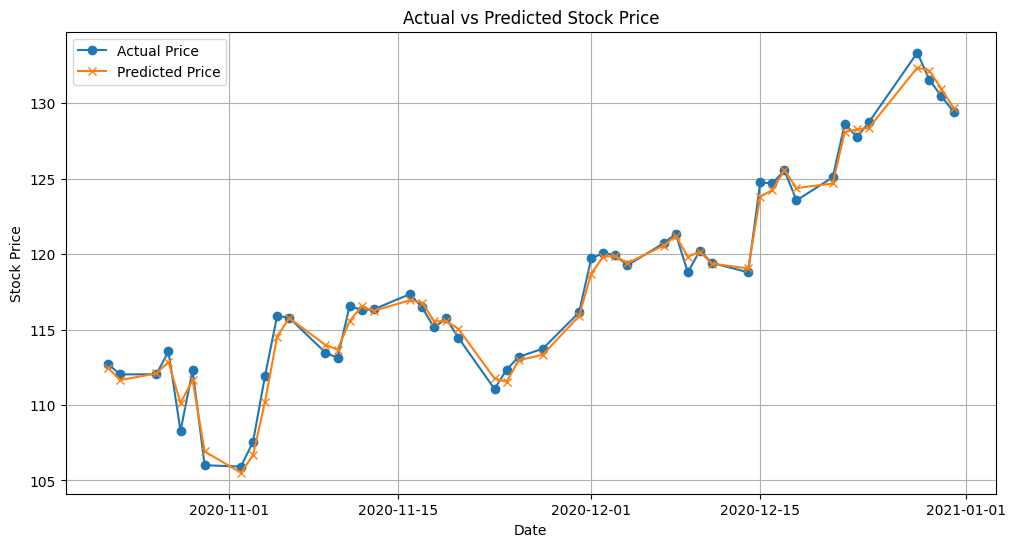

In [16]:
# Plot predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual Price', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Price', marker='x')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.grid(True)
plt.show()
